<div style="text-align: center;">
    <h1>Turo Analysis Notebook</h1>
</div>


## This notebook contains the results from the analysis of the Turo dataset.

---


In [1]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore, pearsonr
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import levene
import scikit_posthocs as sp
import warnings

# see all columns in df
pd.set_option('display.max_columns', None)

# hide warning messages for better readability
warnings.filterwarnings('ignore')

In [2]:
# read in the final/clean df with mapped prices
df = pd.read_excel(r"C:\Users\ibaca\Boys & Girls Clubs of America\0 Templating\python\Turo\Nashville\clean data\Q4_only.xlsx")

# filter for only Nashville
df = df[df['city_oct2023'] == 'Nashville']

# sort by ROI
df.sort_values(by = 'ROI', ascending = False)

,id,trips_oct2023,average_rating_oct2023,average_price_oct2023,host_id_oct2023,all_star_host_oct2023,favorited_by_searcher_oct2023,new_listing_oct2023,make_oct2023,model_oct2023,type_oct2023,year_oct2023,city_oct2023,lat_oct2023,lng_oct2023,trips_jan2024,average_rating_jan2024,average_price_jan2024,host_id_jan2024,all_star_host_jan2024,favorited_by_searcher_jan2024,new_listing_jan2024,city_jan2024,lat_jan2024,lng_jan2024,price_increase_Q4_2023,rating_increase_Q4_2023,make_oct2023:model_oct2023:year_oct2023,make_jan2024,model_jan2024,type_jan2024,year_jan2024,trips_Q4_2023,average_q4_price,price_estimate,estimated_revenue,ROI,potential_ROI_per_day
0,2144777,22,4.9375,46.541250,31452504,True,False,False,Chevrolet,Cruze,CAR,2016,Nashville,36.098049,-86.713528,55,4.9762,40.000000,31452504,True,False,False,Nashville,36.098049,-86.713528,-6.541250,0.0387,Chevrolet:Cruze:2016,Chevrolet,Cruze,CAR,2016,33,43.270625,7849.00,4283.791875,54.58,0.55
1,1981120,42,4.8919,38.748571,32331832,True,False,False,Nissan,Altima,CAR,2015,Nashville,36.190714,-86.718627,75,4.9412,33.604286,32331832,True,False,False,Nashville,36.190714,-86.718627,-5.144286,0.0493,Nissan:Altima:2015,Nissan,Altima,CAR,2015,33,36.176429,8381.88,3581.466429,42.73,0.43
2,2139912,3,5.0000,37.050000,14968141,True,False,False,Nissan,Versa Note,CAR,2016,Nashville,36.152054,-86.682879,23,5.0000,39.000000,14968141,True,False,False,Nashville,36.152054,-86.682879,1.950000,0.0000,Nissan:Versa Note:2016,Nissan,Versa Note,CAR,2016,20,38.025000,5996.00,2281.500000,38.05,0.63
3,995371,96,4.9559,53.740000,17007725,True,False,False,FIAT,500X,SUV,2016,Nashville,36.166808,-86.660946,111,4.9506,57.000000,17007725,True,False,False,Nashville,36.166808,-86.660946,3.260000,-0.0053,FIAT:500X:2016,FIAT,500X,SUV,2016,15,55.370000,6854.00,2491.650000,36.35,0.81
4,2056178,17,5.0000,44.646667,26353189,True,False,False,Mercedes-Benz,C-Class,CAR,2011,Nashville,36.149168,-86.781185,41,4.9688,53.200000,26353189,True,False,False,Nashville,36.149168,-86.781185,8.553333,-0.0312,Mercedes-Benz:C-Class:2011,Mercedes-Benz,C-Class,CAR,2011,24,48.923333,10000.00,3522.480000,35.22,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,2206263,1,NaN,69.495000,32310615,False,False,False,Toyota,Sienna,PASSENGER_MINIVAN,2017,Nashville,36.062875,-86.638926,1,NaN,64.025000,32310615,False,False,False,Nashville,36.062875,-86.638926,-5.470000,NaN,Toyota:Sienna:2017,Toyota,Sienna,PASSENGER_MINIVAN,2017,0,66.760000,24869.00,0.000000,0.00,0.27
672,1545502,23,5.0000,70.500000,25688479,True,False,False,Chevrolet,Equinox,SUV,2022,Nashville,36.030689,-86.615735,23,5.0000,65.000000,25688479,True,False,False,Nashville,36.030689,-86.615735,-5.500000,0.0000,Chevrolet:Equinox:2022,Chevrolet,Equinox,SUV,2022,0,67.750000,22787.32,0.000000,0.00,0.30
673,1770920,13,5.0000,43.436667,22453526,True,False,False,Ford,Fusion,CAR,2019,Nashville,36.032551,-86.646256,13,5.0000,37.525000,22453526,True,False,False,Nashville,36.032551,-86.646256,-5.911667,0.0000,Ford:Fusion:2019,Ford,Fusion,CAR,2019,0,40.480833,15287.14,0.000000,0.00,0.26
674,1181948,24,5.0000,156.000000,19456670,True,False,False,Volvo,XC90,SUV,2016,Nashville,36.169430,-86.684413,24,5.0000,136.500000,19456670,True,False,False,Nashville,36.169430,-86.684413,-19.500000,0.0000,Volvo:XC90:2016,Volvo,XC90,SUV,2016,0,146.250000,14995.00,0.000000,0.00,0.98


---

# Top makes

In [3]:
# calculate the mean, median, and skew ROI for each make
ROI_by_make = df.groupby(by='make_oct2023').agg(mean_ROI = ('ROI', 'mean'),
                                                median_ROI = ('ROI', 'median'), 
                                                skew_ROI = ('ROI', 'skew'))

# calculate a column for the difference (in absolute value) betweent the mean and the median
ROI_by_make['difference'] = abs(ROI_by_make['mean_ROI'] - ROI_by_make['median_ROI'])

# reset the index and sort with the highest difference at the top to see the records that have the largest distance between the mean and median
ROI_by_make = ROI_by_make.reset_index().sort_values(by = 'difference', ascending = False)

# view the 10 makes with the largest differences betweent the mean and median
ROI_by_make.head(10)

,make_oct2023,mean_ROI,median_ROI,skew_ROI,difference
8,FIAT,22.422000,18.250,0.120121,4.172000
29,Ram,5.526667,1.630,1.709117,3.896667
32,Tesla,6.862000,4.330,0.969118,2.532000
11,Honda,10.486667,8.350,0.968789,2.136667
22,Mazda,17.632500,15.700,0.537150,1.932500
21,Maserati,9.000000,10.900,-1.553661,1.900000
5,Chevrolet,10.020541,8.310,2.855889,1.710541
7,Dodge,16.180000,17.775,-0.483646,1.595000
12,Hyundai,12.565000,14.135,0.107903,1.570000
10,GMC,6.614444,5.050,0.512699,1.564444


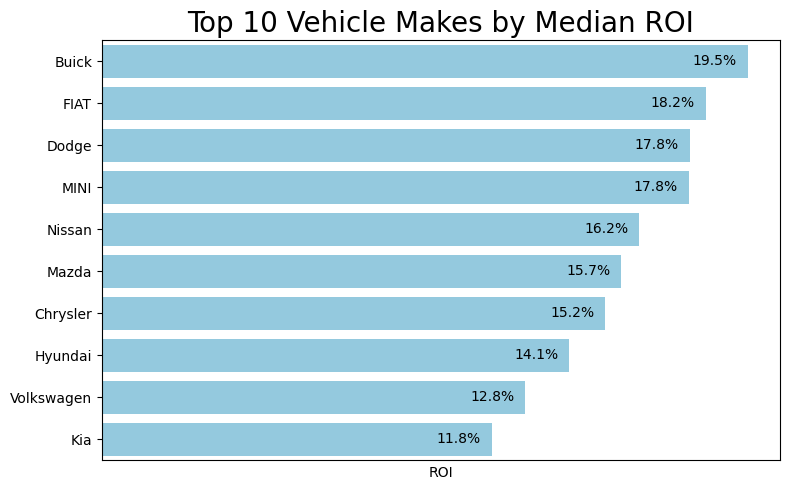

In [65]:
# specify a figure size
plt.figure(figsize=(8, 5))

# sort the data frame by median ROI (data is skewed, so I use median)
ROI_by_make = ROI_by_make.sort_values(by = 'median_ROI', ascending = False)

# visualize with a barplot
ax = sns.barplot(data = ROI_by_make.head(10), x = 'median_ROI', y = 'make_oct2023', color = 'skyblue')

# add data labels
for p in ax.patches:
    width = p.get_width()
    ax.text(x = width - 1,
           y = p.get_y() + p.get_height()/2,
           s = f'{width:.1f}%',
           ha = 'center',
           va = 'center')

# title and labels
plt.title('Top 10 Vehicle Makes by Median ROI', fontsize = 20)
plt.xlabel('ROI')
plt.ylabel('')
plt.xticks([])
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\01", dpi = 300)

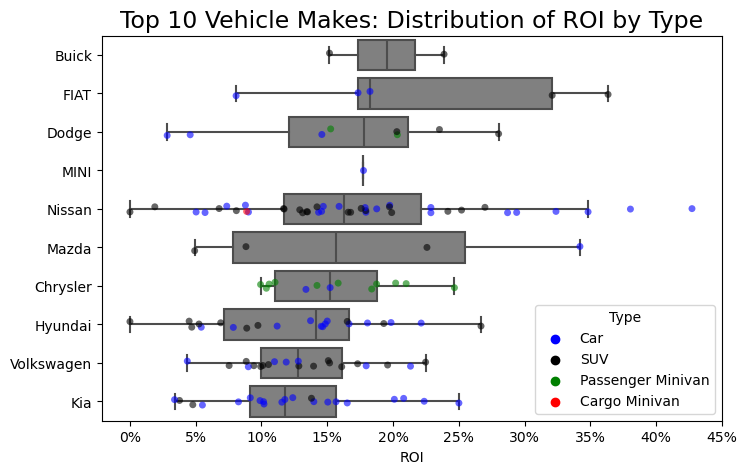

In [5]:
# sort the df to get the top ten makes at the top
top_10_makes_list = ROI_by_make.sort_values(by = 'median_ROI', ascending = False).head(10)

# slice the top ten makes and convert to a list
top_10_makes_list = top_10_makes_list['make_oct2023'].tolist()

# filter the df for the records that include the top ten makes
top_10_makes_df = df[df['make_oct2023'].isin(top_10_makes_list)]

# create a dict of colors to differentiate the type of vehicle
palette = {'SUV':'black', 
           'CAR':'blue', 
           'PASSENGER_MINIVAN':'green', 
           'CARGO_MINIVAN':'red'}

# figure size
plt.figure(figsize=(8, 5))

# visualize with a boxplot
sns.boxplot(data = top_10_makes_df, 
            y = 'make_oct2023', 
            x = 'ROI', 
            showfliers = False, 
            order = top_10_makes_list, 
            color = 'grey')

# add points to plot
stripplot = sns.stripplot(data = top_10_makes_df, 
              y = 'make_oct2023', 
              x = 'ROI', 
              color = 'black', 
              jitter = True, 
              alpha = .6, 
              order = top_10_makes_list, 
              hue = 'type_oct2023',
              palette = palette)

# create a dict to change the names in the legend
legend_labels = {'SUV': 'SUV', 
                 'CAR': 'Car', 
                 'PASSENGER_MINIVAN': 'Passenger Minivan', 
                 'CARGO_MINIVAN': 'Cargo Minivan'}

# rename legend labels
handles, labels = stripplot.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Type')
plt.gca().get_legend().get_frame().set_width(50)

# plot title and labels
plt.title('Top 10 Vehicle Makes: Distribution of ROI by Type', fontsize=17)
plt.ylabel('')
plt.xlabel('ROI')

# set x ticks and labels
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
labels = ['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%']
plt.xticks(ticks = ticks, labels = labels)

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\02", dpi = 300)

---

# Top models

In [6]:
# concatinate make and model
df['make:model'] = df['make_oct2023'] + ':' + df['model_oct2023']

# group by model and find the mean and median
ROI_by_model = df.groupby(by= 'make:model').agg(mean_ROI = ('ROI', 'mean'),
                                                median_ROI = ('ROI', 'median'), 
                                                skew_ROI = ('ROI', 'skew'))

# calculate a column for the difference (in absolute value) betweent the mean and the median
ROI_by_model['difference'] = abs(ROI_by_model['mean_ROI'] - ROI_by_model['median_ROI'])

# reset the index and sort with the highest difference at the top to see the records that have the largest distance between the mean and median
ROI_by_model = ROI_by_model.reset_index().sort_values(by = 'difference', ascending = False)

# view the 10 make:models with the largest differences betweent the mean and median
ROI_by_model.head(10)

,make:model,mean_ROI,median_ROI,skew_ROI,difference
28,Chevrolet:Cruze,28.757500,23.515,1.558732,5.242500
59,Ford:Focus,16.550000,11.940,1.444348,4.610000
159,Toyota:Avalon,10.953333,6.400,1.640943,4.553333
151,Ram:1500,5.526667,1.630,1.709117,3.896667
72,Honda:Civic,10.515000,6.770,1.772404,3.745000
120,Mercedes-Benz:C-Class,13.304444,10.220,1.422136,3.084444
47,FIAT:500,14.553333,17.340,-1.681339,2.786667
14,BMW:X3,9.015000,6.270,1.733067,2.745000
103,Kia:Sportage,7.450000,4.780,1.667100,2.670000
139,Nissan:Rogue Sport,20.566667,17.930,1.650018,2.636667


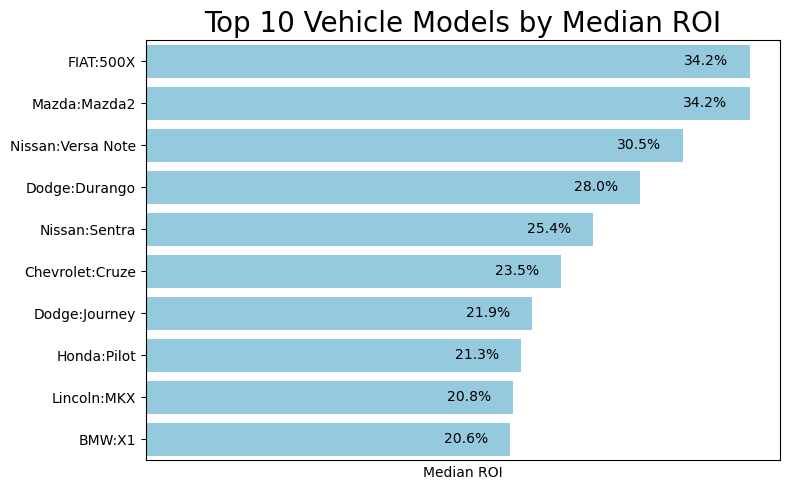

In [7]:
# sort the data frame by median ROI (data is skewed, so I use median)
ROI_by_model = ROI_by_model.sort_values(by = 'median_ROI', ascending = False)

# figure size
plt.figure(figsize=(8, 5))

# visualize with a barplot of the top ten models
ax = sns.barplot(data = ROI_by_model.head(10), x = 'median_ROI', y = 'make:model', color = 'skyblue')

# data labels
for p in ax.patches:
    width = p.get_width()
    ax.text(x = width - 2.5,
            y = p.get_y() + p.get_height()/2,
            s = f'{width:.1f}%',
            ha = 'center',
            va = 'center')

# title and labels
plt.ylabel('')
plt.xlabel('Median ROI')
plt.title('Top 10 Vehicle Models by Median ROI', fontsize = 20)
plt.xticks([])
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\03", dpi = 300)

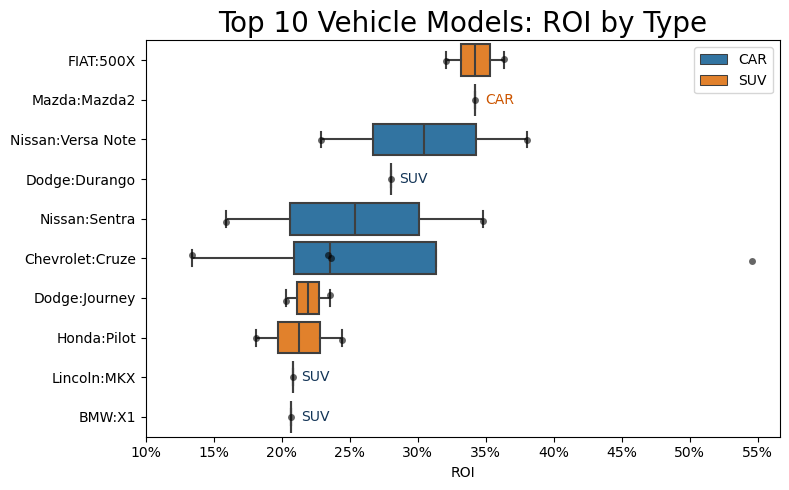

In [8]:
# sort the df to get the top ten models at the top
top_10_models_list = ROI_by_model.sort_values(by = 'median_ROI', ascending = False).head(10)

# slice the top ten models and convert to a list
top_10_models_list = top_10_models_list['make:model'].tolist()

# filter the df for the records that include the top ten models
top_10_models_df = df[df['make:model'].isin(top_10_models_list)]

# figure size
plt.figure(figsize=(8, 5))

# create boxplot
sns.boxplot(data = top_10_models_df, 
            y = 'make:model', 
            x = 'ROI', 
            showfliers = False, 
            order = top_10_models_list, 
            hue = 'type_oct2023', 
            dodge = False)

# add points to plot
sns.stripplot(data = top_10_models_df, 
              y = 'make:model', 
              x = 'ROI', 
              color = 'black', 
              jitter = True, 
              alpha = .6, 
              order = top_10_models_list)

# plot text for single vehicles to specify type
plt.annotate('CAR', xycoords = 'axes fraction', xy = (.535, .84), color = '#CC5500')
plt.annotate('SUV', xycoords = 'axes fraction', xy = (.4, .64), color = '#123456')
plt.annotate('SUV', xycoords = 'axes fraction', xy = (.245, .14), color = '#123456')
plt.annotate('SUV', xycoords = 'axes fraction', xy = (.245, .04), color = '#123456')

# title and labels
plt.title('Top 10 Vehicle Models: ROI by Type', fontsize = 20)
plt.ylabel('')
plt.xlabel('ROI')

# x-ticks and labels
ticks = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
labels = ['10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%', '55%']
plt.xticks(labels = labels, ticks = ticks)
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\04", dpi = 300)

---

# Top vehicles by Make, Model, and Year

In [9]:
# group by model and find the mean, median and skew
ROI_by_model_year = df.groupby(by= 'make_oct2023:model_oct2023:year_oct2023').agg(mean_ROI = ('ROI', 'mean'), 
                                                                                  median_ROI = ('ROI', 'median'), 
                                                                                  skew_ROI = ('ROI', 'skew'))

# calculate a column for the difference (in absolute value) betweent the mean and the median
ROI_by_model_year['difference'] = abs(ROI_by_model_year['mean_ROI'] - ROI_by_model_year['median_ROI'])

# reset the index and sort with the highest difference at the top to see the records that have the largest distance between the mean and median
ROI_by_model_year = ROI_by_model_year.reset_index()

# view the 10 make:model:years with the largest differences betweent the mean and median
ROI_by_model_year.sort_values(by = 'difference', ascending = False).head(10)

,make_oct2023:model_oct2023:year_oct2023,mean_ROI,median_ROI,skew_ROI,difference
296,Nissan:Versa:2019,25.146667,28.710,-1.446525,3.563333
356,Volkswagen:Jetta:2019,14.550000,17.960,-1.461938,3.410000
8,BMW:2 Series:2017,10.256667,7.900,1.209437,2.356667
328,Toyota:Camry:2012,9.586667,11.460,-1.189819,1.873333
103,Ford:Escape:2018,11.190000,9.375,1.505113,1.815000
361,Volkswagen:Tiguan:2021,13.310000,15.080,-1.369774,1.770000
310,Tesla:Model 3:2019,10.270000,12.020,-1.244645,1.750000
359,Volkswagen:Taos:2023,13.980000,12.300,1.003835,1.680000
331,Toyota:Camry:2018,12.296667,10.700,1.201153,1.596667
201,Kia:Forte:2020,13.220000,11.780,0.738695,1.440000


<Axes: xlabel='median_ROI', ylabel='make_oct2023:model_oct2023:year_oct2023'>

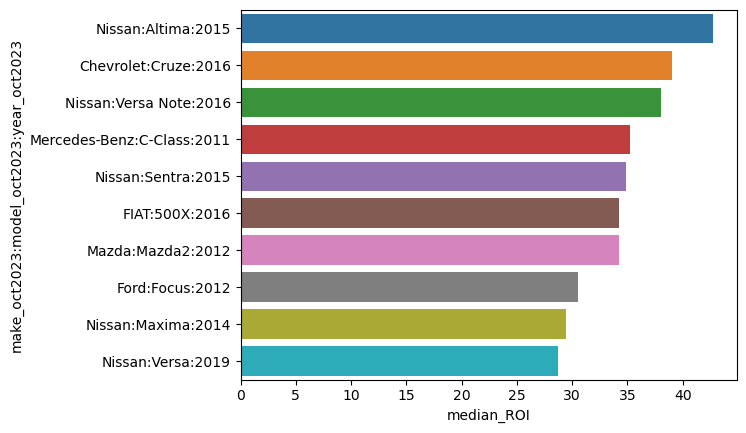

In [10]:
# sort the data frame by median ROI (data is skewed, so I use median)
ROI_by_model_year = ROI_by_model_year.sort_values(by = 'median_ROI', ascending = False)

# visualize with a barplot of the top ten models
sns.barplot(data = ROI_by_model_year.head(10), x = 'median_ROI', y = 'make_oct2023:model_oct2023:year_oct2023')

---

# Analysis of performance by year

In [11]:
# group by year and calculate the mean, median, and skew
ROI_by_year = df.groupby(by= 'year_oct2023').agg(mean_ROI = ('ROI', 'mean'), 
                                                 median_ROI = ('ROI', 'median'), 
                                                 skew_ROI = ('ROI', 'skew'))

# calculate a column for the difference (in absolute value) betweent the mean and the median
ROI_by_year['difference'] = abs(ROI_by_year['mean_ROI'] - ROI_by_year['median_ROI'])

# reset index
ROI_by_year = ROI_by_year.reset_index()

# convert year from int to str
ROI_by_year['year_oct2023'] = ROI_by_year['year_oct2023'].astype(str)

# specify an order for the year variable
order = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

# convert year to an ordered categorical variable using the previously defined order (for plotting purposes)
ROI_by_year['year_oct2023'] = pd.Categorical(ROI_by_year['year_oct2023'], categories = order, ordered = True)

# sort with the highest difference at the top to see the records that have the largest distance between the mean and median
ROI_by_year.sort_values(by = 'difference', ascending = False)

,year_oct2023,mean_ROI,median_ROI,skew_ROI,difference
6,2016,14.394211,11.460,1.471828,2.934211
7,2017,11.252000,8.545,0.636071,2.707000
10,2020,10.230781,8.430,0.571200,1.800781
3,2013,11.342143,9.755,0.226678,1.587143
9,2019,10.251250,8.670,1.106604,1.581250
5,2015,13.227391,11.940,1.786332,1.287391
2,2012,18.181818,17.340,0.217981,0.841818
4,2014,15.355625,16.190,-0.359354,0.834375
12,2022,6.502877,5.720,0.567353,0.782877
11,2021,9.083167,8.335,0.398095,0.748167


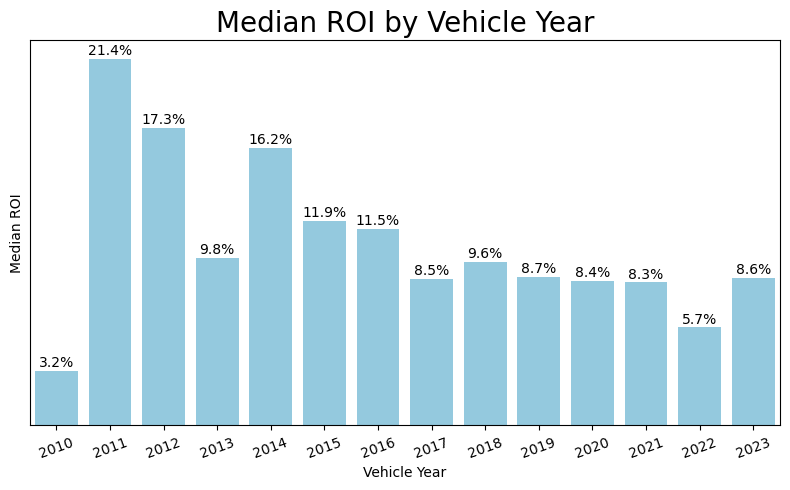

In [12]:
# specify a figure size
plt.figure(figsize=(8, 5))

# sort the data frame by median ROI (data is skewed, so I use median)
ROI_by_year = ROI_by_year.sort_values(by = 'median_ROI', ascending = False)

# visualize with bar plot
ax = sns.barplot(data = ROI_by_year, y = 'median_ROI', x = 'year_oct2023', color = 'skyblue')

# data labels
for p in ax.patches: 
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2,
            y = height +.45,
            s = f'{height:.1f}%',
            ha = 'center',
            va = 'center')

# title and labels
plt.title('Median ROI by Vehicle Year', fontsize = 20)
plt.ylabel('Median ROI')
plt.yticks([])
plt.xlabel('Vehicle Year')
plt.xticks(rotation = 20)
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\05", dpi = 300)

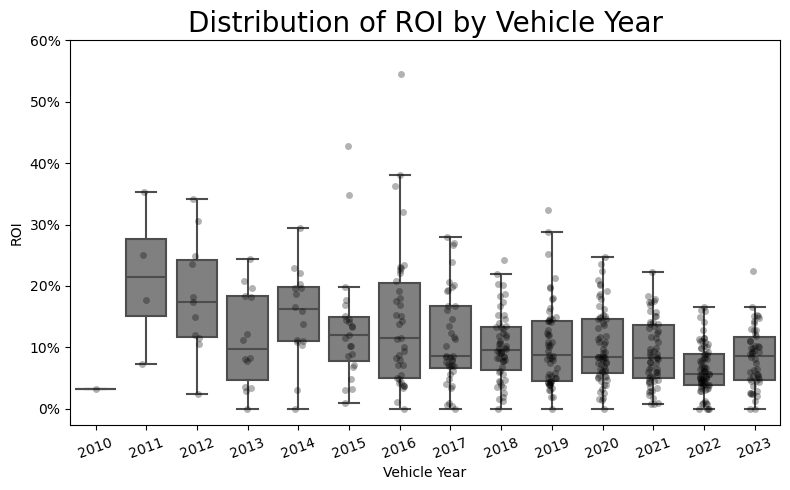

In [13]:
# change year from an int to a str
df['year_oct2023'] = df['year_oct2023'].astype(str)

# specify a figure size
plt.figure(figsize=(8, 5))

# create boxplot
sns.boxplot(data=df, 
            x='year_oct2023', 
            y ='ROI', 
            showfliers=False, 
            order = order, 
            color = 'grey')

# add points to plot
sns.stripplot(data = df, 
              x = 'year_oct2023', 
              y = 'ROI', 
              jitter = True, 
              alpha = .3, 
              order = order, 
              color = 'black')

# title and labels
plt.title('Distribution of ROI by Vehicle Year', fontsize = 20)
plt.xlabel('Vehicle Year')

# y-labels
ticks = [0, 10, 20, 30, 40, 50, 60]
labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
plt.yticks(labels = labels, ticks = ticks)
plt.xticks(rotation = 20)
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\06", dpi = 300)

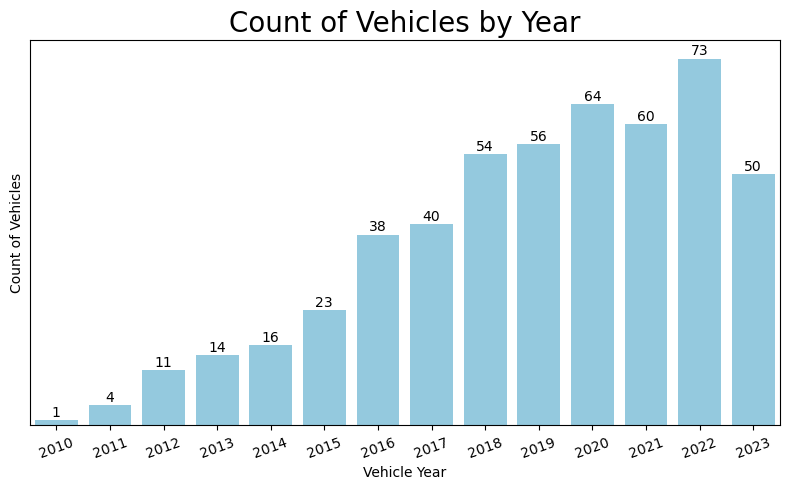

In [14]:
# group by year and count observations in each year
count_by_year = df.groupby(by = 'year_oct2023').count()[['id']].reset_index()

# rename column headers
count_by_year = count_by_year.rename(columns = {'id':'total_vehicles'})

# specify a figure size
plt.figure(figsize=(8, 5))

# plot count of cars for each year
ax = sns.barplot(data = count_by_year, x = 'year_oct2023', y = 'total_vehicles', color = 'skyblue')

# data labels
for p in ax.patches:
    height = round(p.get_height())
    ax.text(x = p.get_x() + p.get_width()/2,
            y = height + 1.45,
            s = f'{height}',
            ha = 'center', 
            va = 'center')

#titles and labels
plt.title('Count of Vehicles by Year', fontsize = 20)
plt.ylabel('Count of Vehicles')
plt.xlabel('Vehicle Year')
plt.yticks([])
plt.xticks(rotation = 20)
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\07", dpi = 300)

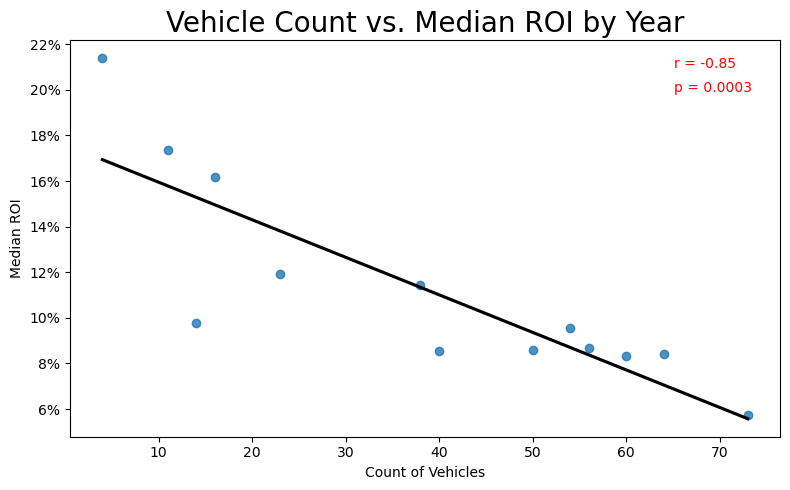

In [15]:
# merge the count_by_year df with the ROI_by_year df
year_count_ROI = pd.merge(count_by_year, ROI_by_year, how = 'inner', on = 'year_oct2023')

# remove the one car from 2010 (its an outlier and we wouldnt be able to list a 2010 vehicle due to turo rules)
year_count_ROI = year_count_ROI[year_count_ROI['year_oct2023'] != '2010']

# specify a figure size
plt.figure(figsize=(8, 5))

# linear regression plot
sns.regplot(data = year_count_ROI, 
            x = 'total_vehicles', 
            y = 'median_ROI', 
            ci = None, 
            line_kws = {'color':'black'})

# calculate correlation coefficient and p-value
corr, p_value = pearsonr(year_count_ROI['total_vehicles'], year_count_ROI['median_ROI'])

# add text for correlation coefficient and p-value
plt.annotate(f'r = {corr:.2f}', xy = (.85, .93), xycoords = 'axes fraction', color = 'red')
plt.annotate(f'p = {p_value:.4f}', xy = (.85, .87), xycoords = 'axes fraction', color = 'red')

# title and labels
plt.title('Vehicle Count vs. Median ROI by Year', fontsize = 20)
plt.ylabel('Median ROI')
plt.xlabel('Count of Vehicles')

# y-labels
ticks = [6, 8, 10, 12, 14, 16, 18, 20, 22]
labels = ['6%', '8%', '10%', '12%', '14%', '16%', '18%', '20%', '22%']
plt.yticks(labels = labels, ticks = ticks)
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\08", dpi = 300)

---

# Analysis of performance by type

In [16]:
# group by type and calculate the mean, median, and skew
ROI_by_type = df.groupby(by= 'type_oct2023').agg(mean_ROI = ('ROI', 'mean'), 
                                                 median_ROI = ('ROI', 'median'), 
                                                 skew_ROI = ('ROI', 'skew'))
# calculate a column for the difference (in absolute value) betweent the mean and the median
ROI_by_type['difference'] = abs(ROI_by_type['mean_ROI'] - ROI_by_type['median_ROI'])

# reset index
ROI_by_type = ROI_by_type.reset_index()

# sort by difference column
ROI_by_type.sort_values(by = 'difference', ascending = False)

,type_oct2023,mean_ROI,median_ROI,skew_ROI,difference
0,CAR,11.368095,9.555,1.638202,1.813095
2,PASSENGER_MINIVAN,12.497917,10.940,0.020375,1.557917
5,TRUCK,5.315000,4.015,1.265872,1.300000
4,SUV,9.568340,8.320,1.074910,1.248340
3,PASSENGER_VAN,14.068333,13.885,-0.578479,0.183333
1,CARGO_MINIVAN,8.870000,8.870,NaN,0.000000
6,VAN,6.765000,6.765,NaN,0.000000


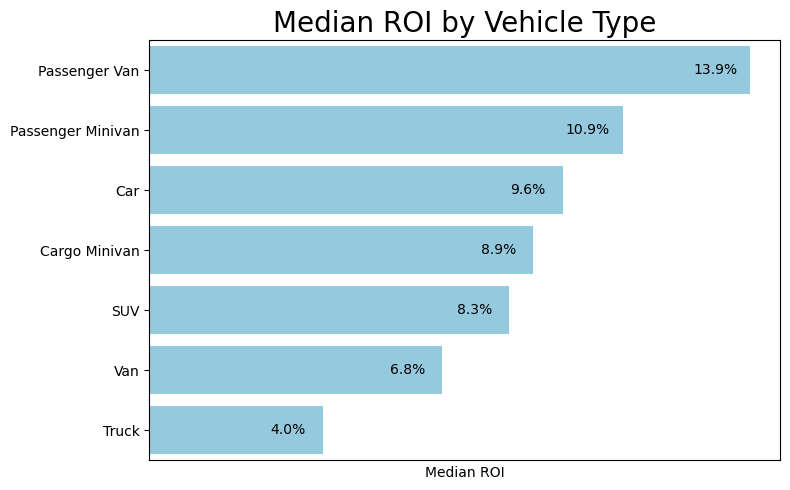

In [17]:
# sort by median and visualize with a bar plot
ROI_by_type = ROI_by_type.sort_values(by = 'median_ROI', ascending = False)

# specify a figure size
plt.figure(figsize=(8, 5))

# visualize bar plot
ax = sns.barplot(data = ROI_by_type, 
                 x = 'median_ROI', 
                 y = 'type_oct2023', 
                 color = 'skyblue')

# data labels
for p in ax.patches:
    width = p.get_width()
    ax.text(y = p.get_y() + p.get_height()/2,
         x = width - .8,
         s = f'{width:.1f}%',
         ha = 'center', 
         va = 'center')

# title and labels
plt.title('Median ROI by Vehicle Type', fontsize = 20)
plt.ylabel('')
plt.xlabel('Median ROI')

# rename y-ticks
plt.yticks(ticks = ax.get_yticks(), 
           labels = ['Passenger Van', 'Passenger Minivan', 'Car', 'Cargo Minivan', 'SUV', 'Van', 'Truck'])

# remove x-ticks
plt.xticks([])
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\09", dpi = 300)

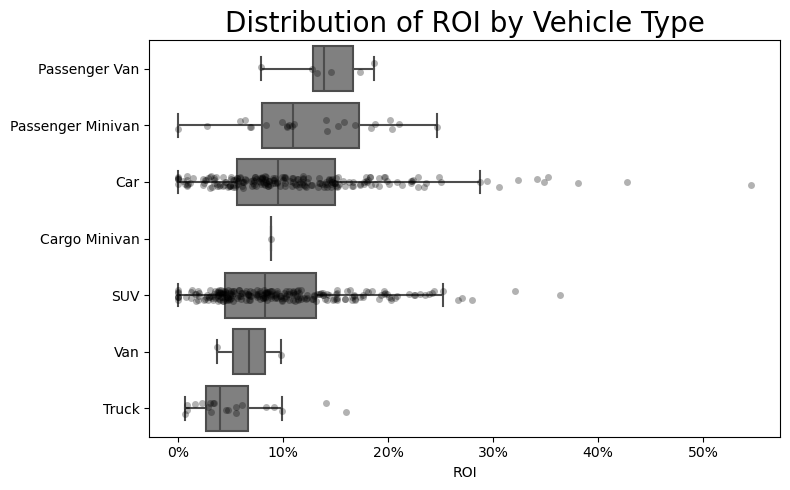

In [18]:
# specify an order for the types
order = ['PASSENGER_VAN', 'PASSENGER_MINIVAN', 'CAR', 'CARGO_MINIVAN', 'SUV', 'VAN', 'TRUCK']

# specify a figure size
plt.figure(figsize=(8, 5))

# create boxplot with specified order
sns.boxplot(data=df, 
            y ='type_oct2023', 
            x ='ROI', 
            showfliers=False,
            order = order,
            color = 'grey')

# add points to plot
sns.stripplot(data = df, 
              y = 'type_oct2023', 
              x = 'ROI', 
              jitter = True, 
              alpha = .3,
              order = order,
              color = 'black')

# title and labels
plt.title('Distribution of ROI by Vehicle Type', fontsize = 20)
plt.xlabel('ROI')
plt.ylabel('')

# rename y-ticks and x-ticks
plt.yticks(ticks = ax.get_yticks(), 
           labels = ['Passenger Van', 'Passenger Minivan', 'Car', 'Cargo Minivan', 'SUV', 'Van', 'Truck'])
plt.xticks(ticks = [0, 10, 20, 30, 40, 50], labels = ['0%', '10%', '20%', '30%', '40%', '50%'])
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\10", dpi = 300)

---

# Part Two: Statistical Tests

---

## Comparisons

I want to assess whether there is a significant difference in ROI among the following three categories:

- Owners who own multiple vehicles VS owner who own a single vehicle
- All-star hosts VS non-all-star hosts
- New listings VS old listings

---

## ROI for owners who own multiple vehicles VS owner who own a single vehicle

In [19]:
#change host id from int to string
df['host_id_oct2023'] = df['host_id_oct2023'].astype(str)

# group by host and count vehicles per host
count_by_host = df.groupby(by = 'host_id_oct2023').count()

# sort hosts with the most vehicles to the top
count_by_host = count_by_host.sort_values(by = 'id', ascending = False).reset_index()

# slice only the columns of interest
count_by_host = count_by_host[['host_id_oct2023', 'id']]

# list of owner ids that have only one vehicle
single = count_by_host[count_by_host['id'] == 1]
single_list = list(single['host_id_oct2023'])

#list of owner ids that have multiple vehicles
multiple = count_by_host[count_by_host['id'] > 1]
multiple_list = list(multiple['host_id_oct2023'])

# df with hosts that only have one vehicle
one_car_df = df[df['host_id_oct2023'].isin(single_list)]

# df of hosts that have multiple vehicles
multiple_cars_df = df[df['host_id_oct2023'].isin(multiple_list)]

# add columns specifying the number of cars each owner has
one_car_df['owner_vehicle_count'] = 'one'
multiple_cars_df['owner_vehicle_count'] = 'multiple'
one_car_df['owner_vehicle_count_dummy'] = 0
multiple_cars_df['owner_vehicle_count_dummy'] = 1

# concatinate the dfs back together with the new column
df = pd.concat(objs = [one_car_df, multiple_cars_df], ignore_index = True)

# calculate the mean ROI for every host
mean_ROI_by_host = df.groupby(by = 'host_id_oct2023').agg({'ROI':'mean', 'owner_vehicle_count_dummy':'mean'}).reset_index()

# create a df for hosts with one vehicle
mean_ROI_by_host_one = mean_ROI_by_host[mean_ROI_by_host['owner_vehicle_count_dummy'] == 0]

# create a df for hosts with multiple vehicles
mean_ROI_by_host_multiple = mean_ROI_by_host[mean_ROI_by_host['owner_vehicle_count_dummy'] == 1]

---

## Testing for normality (hosts with one vehicle VS hosts with multiple vehicles)

shapiro-wilk statistic for hosts with one vehicle = 0.9384
p-value for hosts with one vehicle = 0.0000
 
shapiro-wilk statistic for hosts with multiple vehicles = 0.9352
p-value for hosts with multiple vehicles = 0.0002


Text(0.5, 1.0, '')

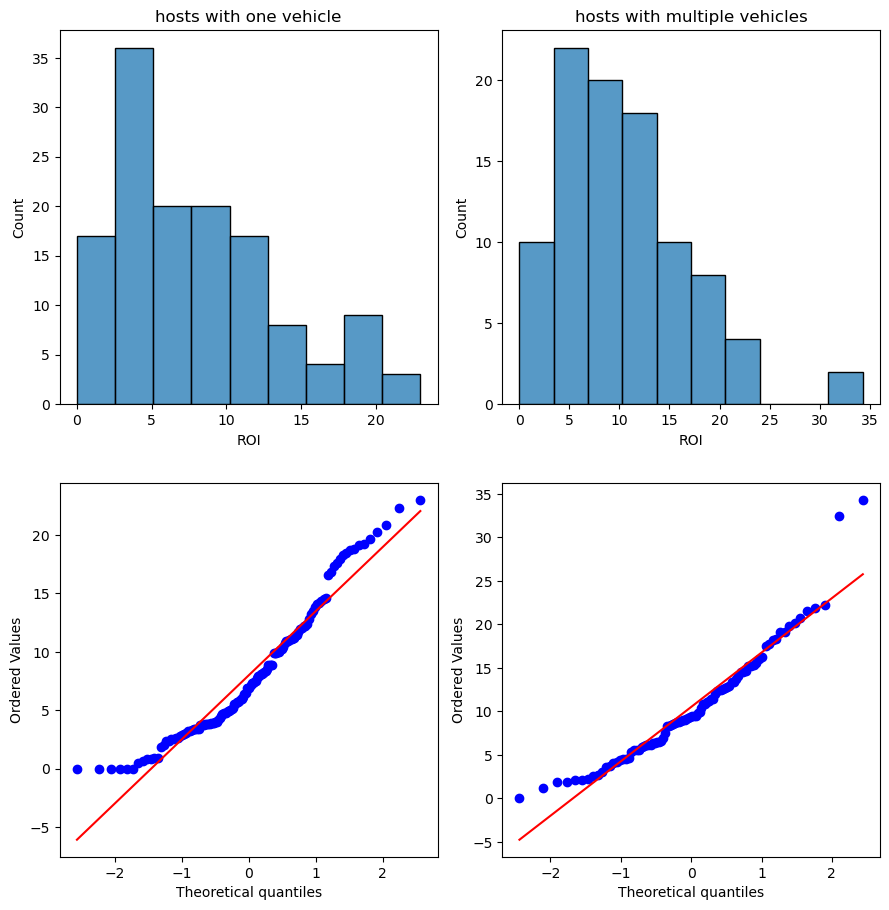

In [20]:
# set up sub plots
fig, axs = plt.subplots(2, 2, figsize = (9, 9))

# histogram and qq plot for hosts with one vehicle
sns.histplot(mean_ROI_by_host_one['ROI'], ax = axs[0, 0])
stats.probplot(mean_ROI_by_host_one['ROI'], dist = 'norm', plot = axs[1, 0])

# histogram and qq plot for hosts with multiple vehicles
sns.histplot(mean_ROI_by_host_multiple['ROI'], ax = axs[0, 1])
stats.probplot(mean_ROI_by_host_multiple['ROI'], dist = 'norm', plot = axs[1, 1])

# adjust layout
plt.tight_layout()

# calulate shapiro-wilk statistic and p-value for hosts with one vehicle
stat_one, p_value_one = stats.shapiro(mean_ROI_by_host_one['ROI'])
print(f'shapiro-wilk statistic for hosts with one vehicle = {stat_one:.4f}')
print(f'p-value for hosts with one vehicle = {p_value_one:.4f}')
print(' ')

# calulate shapiro-wilk statistic and p-value for hosts with multiple vehicles
stat_mult, p_value_mult = stats.shapiro(mean_ROI_by_host_multiple['ROI'])
print(f'shapiro-wilk statistic for hosts with multiple vehicles = {stat_mult:.4f}')
print(f'p-value for hosts with multiple vehicles = {p_value_mult:.4f}')

# set titles for the top graphs
axs[0, 0].set_title('hosts with one vehicle')
axs[0, 1].set_title('hosts with multiple vehicles')

# remove titles for the bottom graphs
axs[1, 0].set_title('')
axs[1, 1].set_title('')

Histogram and QQ plot both suggest that the mean ROI is not distributed normally in either group. The p-value for the shapiro-wilk test is below the threshold for statistical significance at alpha = .05.  We can conclude that this data is not distributed normally.



---

## Mann-Whitney U test for comparing owners who own multiple vehicles VS owners who own a single vehicle

The Mann-Whitney U test is a non-parametric test used to compare differences between two independent groups when the data are not normally distributed. Unlike the t-test, which assumes normality, the Mann-Whitney U test does not rely on distributional assumptions and is based on ranking the data, making it suitable for non-normal or skewed data.

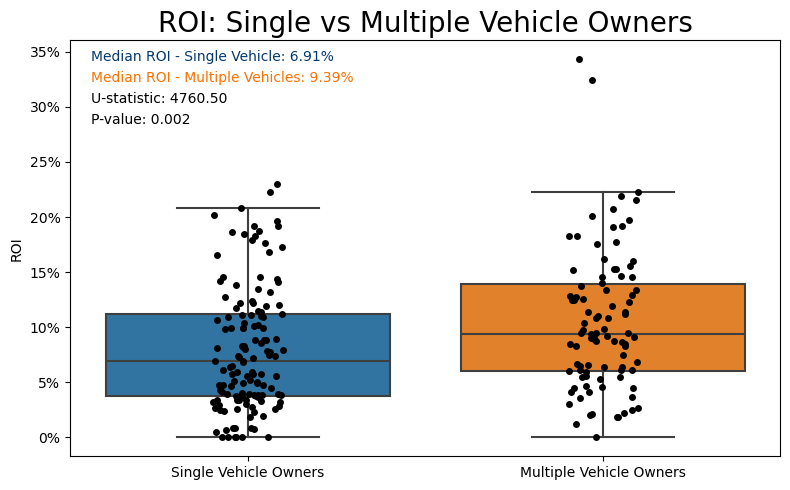

In [21]:
# mann-whitney U test for comparing medians 
u_stat, p_value = stats.mannwhitneyu(mean_ROI_by_host_one['ROI'], mean_ROI_by_host_multiple['ROI'])

# calculate medians for each group
median_single_vehicle =  mean_ROI_by_host_one['ROI'].median()
median_multiple_vehicles = mean_ROI_by_host_multiple['ROI'].median()

# specify a figure size
plt.figure(figsize = (8, 5))

# boxplot
sns.boxplot(data = mean_ROI_by_host, 
            x = 'owner_vehicle_count_dummy', 
            y = 'ROI', 
            showfliers = False)

# one dot for every host
sns.stripplot(data = mean_ROI_by_host, 
              x = 'owner_vehicle_count_dummy', 
              y = 'ROI', 
              jitter = True, 
              color = 'black')

# add text to the graph with the U-statistic, p-value, and medians
plt.annotate(f'Median ROI - Single Vehicle: {median_single_vehicle:.2f}%', 
             xycoords = 'axes fraction', 
             xy = (.03, .95), 
             color = '#03396c')

plt.annotate(f'Median ROI - Multiple Vehicles: {median_multiple_vehicles:.2f}%', 
             xycoords = 'axes fraction', 
             xy = (.03, .9), 
             color = '#fb7200')

plt.annotate(f'U-statistic: {u_stat:.2f}', 
             xycoords = 'axes fraction', 
             xy = (.03, .85), 
             color = 'black')

plt.annotate(f'P-value: {p_value:.3f}', 
             xycoords = 'axes fraction', 
             xy = (.03, .8), 
             color = 'black')

# lables and titles
plt.title('ROI: Single vs Multiple Vehicle Owners', fontsize = 20)
plt.xlabel('')
plt.ylabel('ROI')

# x-ticks and y-ticks
plt.xticks(ticks = [0, 1], labels = ['Single Vehicle Owners', 'Multiple Vehicle Owners'])
plt.yticks(ticks = [0, 5, 10, 15, 20, 25, 30, 35], labels = ['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%'])
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\11", dpi = 300)

### **Conclusion: Owners who own multiple vehicles do significantly better than owners who own a single vehicle**

---

## Testing for normality (all star hosts VS non all star hosts)

shapiro-wilk statistic for all star hosts = 0.9477
p-value for all star hosts = 0.0000
 
shapiro-wilk statistic for non all star hosts = 0.8686
p-value for non all star hosts = 0.0000


Text(0.5, 1.0, '')

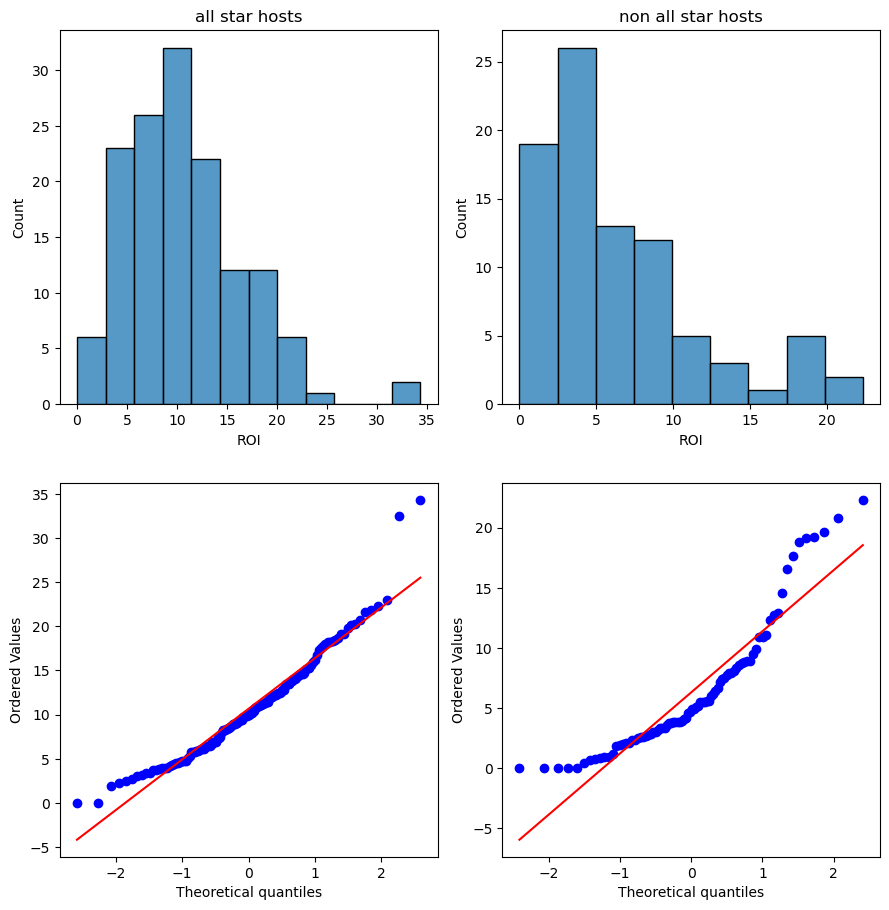

In [22]:
# create a dummy variable for 'all_star_host_jan2024' where 'True' = 1, and 'False' = 0
df['all_star_host_dummy'] = df['all_star_host_jan2024'].apply(lambda x: 1 if x == True else 0)

# calculate the mean ROI for each host
mean_ROI_by_host_allstar = df.groupby(by = 'host_id_oct2023').agg({'ROI':'mean', 'all_star_host_dummy':'mean'})

# create a df for all star hosts
mean_ROI_by_host_allstar_yes = mean_ROI_by_host_allstar[mean_ROI_by_host_allstar['all_star_host_dummy'] == 1]

# create a df for non all star hosts
mean_ROI_by_host_allstar_no = mean_ROI_by_host_allstar[mean_ROI_by_host_allstar['all_star_host_dummy'] == 0]

# set up sub plots
fig, axs = plt.subplots(2, 2, figsize = (9, 9))

# histogram and qq plot for all star hosts
sns.histplot(mean_ROI_by_host_allstar_yes['ROI'], ax = axs[0, 0])
stats.probplot(mean_ROI_by_host_allstar_yes['ROI'], dist = 'norm', plot = axs[1, 0])

# histogram and qq plot for non all star hosts
sns.histplot(mean_ROI_by_host_allstar_no['ROI'], ax = axs[0, 1])
stats.probplot(mean_ROI_by_host_allstar_no['ROI'], dist = 'norm', plot = axs[1, 1])

# adjust layout
plt.tight_layout()

# calulate shapiro-wilk statistic and p-value for all star hosts
stat_yes, p_value_yes = stats.shapiro(mean_ROI_by_host_allstar_yes['ROI'])
print(f'shapiro-wilk statistic for all star hosts = {stat_yes:.4f}')
print(f'p-value for all star hosts = {p_value_yes:.4f}')
print(' ')

# calulate shapiro-wilk statistic and p-value for old listings
stat_no, p_value_no = stats.shapiro(mean_ROI_by_host_allstar_no['ROI'])
print(f'shapiro-wilk statistic for non all star hosts = {stat_no:.4f}')
print(f'p-value for non all star hosts = {p_value_no:.4f}')

# set titles for the top graphs
axs[0, 0].set_title('all star hosts')
axs[0, 1].set_title('non all star hosts')


# remove titles for the bottom graphs
axs[1, 0].set_title('')
axs[1, 1].set_title('')

Histogram and QQ plot both suggest that the mean ROI is not distributed normally in either group. The p-value for the shapiro-wilk test is below the threshold for statistical significance at alpha = .05.  We can conclude that this data is not distributed normally.

---

## Mann-Whitney U test for comparing all star hosts VS non all star hosts

In [23]:
# mann-whitney U test for comparing ROI between all star hosts and non all star hosts
u_stat, p_value = stats.mannwhitneyu(mean_ROI_by_host_allstar_no['ROI'], mean_ROI_by_host_allstar_yes['ROI'])

# print the u-statistic and the p-value
print(u_stat)
print(p_value)

3164.5
1.1129943110506555e-09


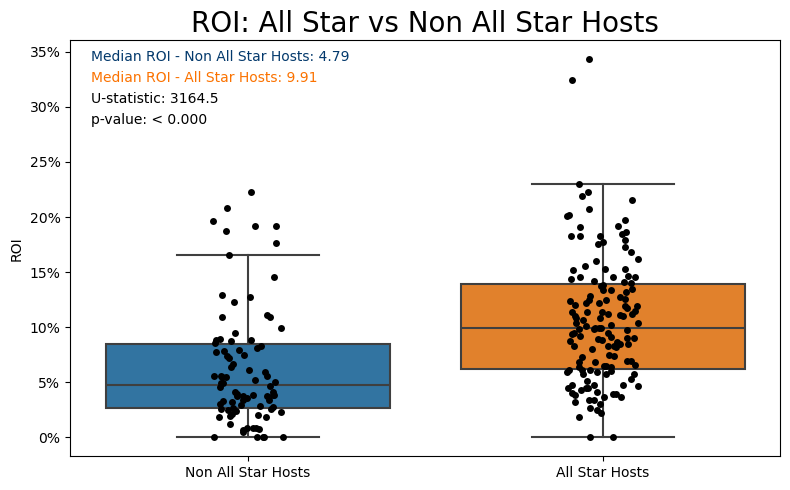

In [24]:
# mann-whitney U test for comparing ROI between all star hosts and non all star hosts
u_stat, p_value = stats.mannwhitneyu(mean_ROI_by_host_allstar_no['ROI'], mean_ROI_by_host_allstar_yes['ROI'])

# calculate median for each group
median_allstar = mean_ROI_by_host_allstar_yes['ROI'].median()
median_non_allstar = mean_ROI_by_host_allstar_no['ROI'].median()

# specify a figure size
plt.figure(figsize = (8, 5))

# visualize with a boxplot
sns.boxplot(data = mean_ROI_by_host_allstar, 
            x = 'all_star_host_dummy', 
            y = 'ROI', 
            showfliers = False)

# dot for each host
sns.stripplot(data = mean_ROI_by_host_allstar, 
              x = 'all_star_host_dummy', 
              y = 'ROI',
              jitter = True,
              color = 'black')

# add text to the graph with the U-statistic, p-value, and medians
plt.annotate(f'Median ROI - Non All Star Hosts: {median_non_allstar:.2f}', 
             xycoords = 'axes fraction', 
             xy = (.03, .95), 
             color = '#03396c')

plt.annotate(f'Median ROI - All Star Hosts: {median_allstar:.2f}', 
             xycoords = 'axes fraction', 
             xy = (.03, .90), 
             color = '#fb7200')

plt.annotate(f'U-statistic: {u_stat}', 
             xycoords = 'axes fraction', 
             xy = (.03, .85), 
             color = 'black')

plt.annotate(f'p-value: < 0.000', 
             xycoords = 'axes fraction', 
             xy = (.03, .80), 
             color = 'black')

# title and labels
plt.xlabel('')
plt.title('ROI: All Star vs Non All Star Hosts', fontsize = 20)

# x-ticks and y-ticks
plt.xticks(ticks = [0, 1], labels = ['Non All Star Hosts', 'All Star Hosts'])
plt.yticks(ticks = [0, 5, 10, 15, 20, 25, 30, 35], labels = ['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%'])
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\12", dpi = 300)

### **Conclusion: All star hosts do significantly better than non all star hosts**

---

## Testing for normality (new listings VS old listings)

shapiro-wilk statistic for new listings = 0.8782
p-value for new listings = 0.0076
 
shapiro-wilk statistic for old listings = 0.9062
p-value for old listings = 0.0000


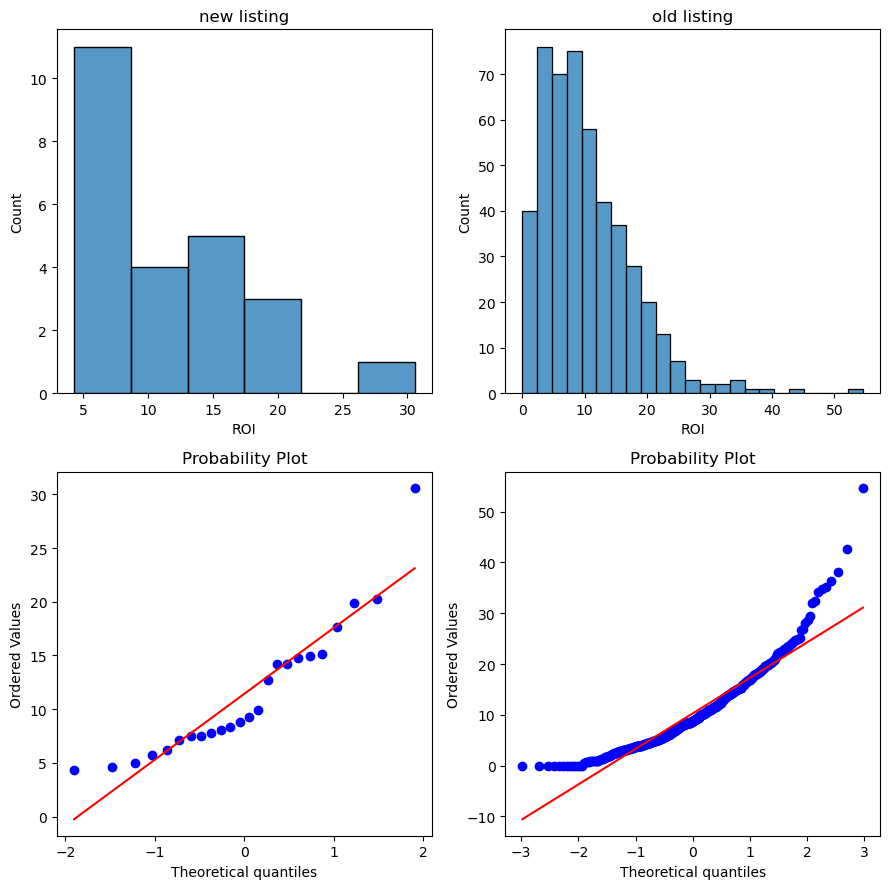

In [25]:
# create a dummy variable for 'new_listing_oct2023' where 'True' = 1, and 'False' = 0
df['new_listing_dummy'] = df['new_listing_oct2023'].apply(lambda x: 1 if x == True else 0)

# create a df for new listings
new_listing_dummy_yes = df[df['new_listing_dummy'] == 1]

# create a df for old listings
new_listing_dummy_no = df[df['new_listing_dummy'] == 0]

# set up sub plots
fig, axs = plt.subplots(2, 2, figsize = (9, 9))

# histogram and qq plot for new listings
sns.histplot(new_listing_dummy_yes['ROI'], ax = axs[0, 0])
stats.probplot(new_listing_dummy_yes['ROI'], dist = 'norm', plot = axs[1, 0])

# histogram and qq plot for old listings
sns.histplot(new_listing_dummy_no['ROI'], ax = axs[0, 1])
stats.probplot(new_listing_dummy_no['ROI'], dist = 'norm', plot = axs[1, 1])

# set titles for the top graphs
axs[0, 0].set_title('new listing')
axs[0, 1].set_title('old listing')

# adjust layout
plt.tight_layout()

# calulate shapiro-wilk statistic and p-value for new listings
stat_new, p_value_new = stats.shapiro(new_listing_dummy_yes['ROI'])
print(f'shapiro-wilk statistic for new listings = {stat_new:.4f}')
print(f'p-value for new listings = {p_value_new:.4f}')
print(' ')

# calulate shapiro-wilk statistic and p-value for old listings
stat_old, p_value_old = stats.shapiro(new_listing_dummy_no['ROI'])
print(f'shapiro-wilk statistic for old listings = {stat_old:.4f}')
print(f'p-value for old listings = {p_value_old:.4f}')

Histogram and QQ plot both suggest that the mean ROI is not distributed normally in either group. The p-value for the shapiro-wilk test is below the threshold for statistical significance at alpha = .05.  We can conclude that this data is not distributed normally.

---


## Mann-Whitney U test for comparing new listings VS old listings

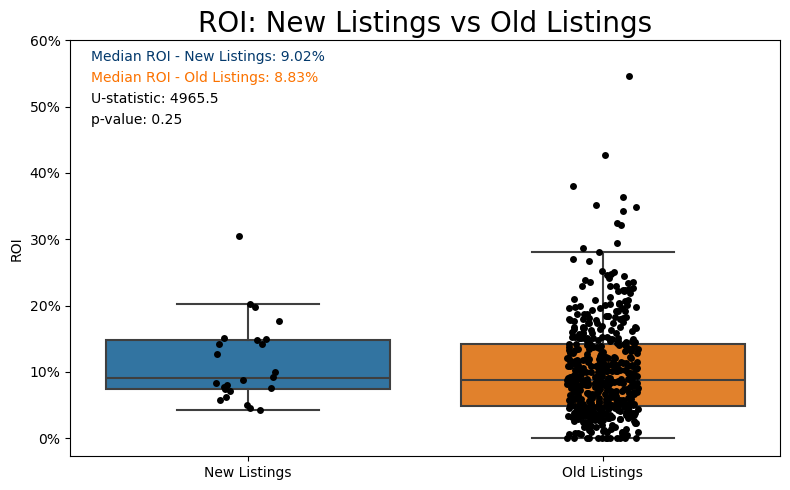

In [26]:
# mann-whitney U test for comparing ROI between all star hosts and non all star hosts
u_stat, p_value = stats.mannwhitneyu(new_listing_dummy_no['ROI'], new_listing_dummy_yes['ROI'])

# calculate median for each group
median_new_listing = new_listing_dummy_yes['ROI'].median()
median_non_new_listing = new_listing_dummy_no['ROI'].median()

# specify an order
order = [1, 0]

# specify a figure size
plt.figure(figsize = (8, 5))

# boxplot
sns.boxplot(data = df, 
            x = 'new_listing_dummy', 
            y = 'ROI', 
            showfliers = False, 
            order = order)

# dot for each host
sns.stripplot(data = df, 
              x = 'new_listing_dummy', 
              y = 'ROI', 
              color = 'black',
             order = order)

plt.annotate(f'Median ROI - Old Listings: {median_non_new_listing:.2f}%', 
             xycoords = 'axes fraction', 
             xy = (.03, .90), 
             color = '#fb7200')

plt.annotate(f'Median ROI - New Listings: {median_new_listing:.2f}%', 
             xycoords = 'axes fraction', 
             xy = (.03, .95), 
             color = '#03396c')

plt.annotate(f'U-statistic: {u_stat}', 
             xycoords = 'axes fraction', 
             xy = (.03, .85), 
             color = 'black')

plt.annotate(f'p-value: {p_value:.2f}', 
             xycoords = 'axes fraction', 
             xy = (.03, .80), 
             color = 'black')

# lables and titles
plt.title('ROI: New Listings vs Old Listings', fontsize = 20)
plt.xlabel('')
plt.ylabel('ROI')

# x-ticks and y-ticks
plt.xticks(ticks = [0, 1], labels = ['New Listings', 'Old Listings'])
plt.yticks(ticks = [0, 10, 20, 30, 40, 50, 60], labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%'])
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\13", dpi = 300)

### **Conclusion: There is no significant difference in performance between new listings and old listings**

---

# Predicting the best price to list a vehicle

I visualized the data using a scatter plot with Price Per Day (as a percentage of vehicle value) on the x-axis and ROI on the y-axis. The plot shows that ROI is lowest at the extreme ends of the price spectrum and highest in the middle. This indicates that both underpricing and overpricing the vehicle reduce ROI. My goal is to identify the optimal pricing point that maximizes ROI

### LOWESS (Locally Weighted Scatterplot Smoothing)

I employed LOWESS (Locally Weighted Scatterplot Smoothing) to pinpoint the peak among data points in a scatter plot. The primary rationale for choosing LOWESS was the non-normal distribution of the data, which displayed skewness and potential outliers, rendering parametric methods like second-order polynomial regression less appropriate.

### Result

The LOWESS curve suggests that the peak occurs between 0.5% and 0.6% of the vehicle's value. Therefore, the optimal pricing point to maximize ROI falls within this range.

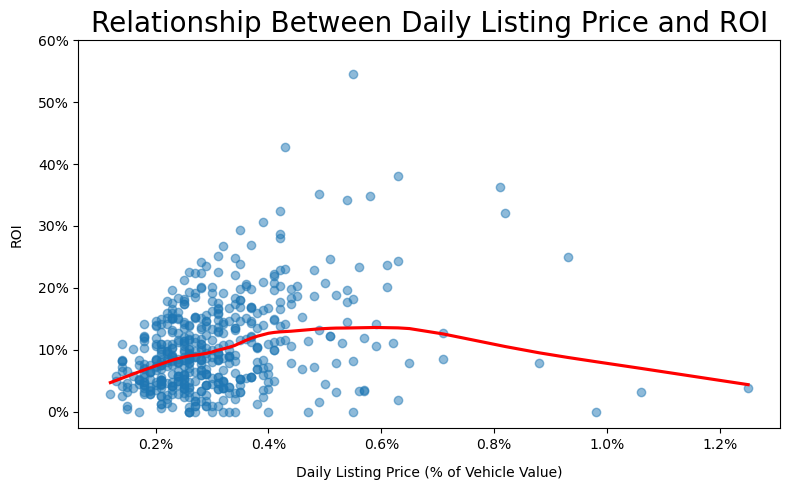

In [27]:
# Plotting with seaborn and non-linear trend line
plt.figure(figsize=(8, 5))

# plot regression line
sns.regplot(x=df['potential_ROI_per_day'], y=df['ROI'], lowess=True, scatter_kws={'alpha':0.5}, line_kws = {'color': 'red'})

# titles and labels
plt.title('Relationship Between Daily Listing Price and ROI', fontsize = 20)
plt.xlabel('Daily Listing Price (% of Vehicle Value)', labelpad = 10)
plt.ylabel('ROI', labelpad = 10)

# x and y ticks
plt.xticks(ticks = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2], labels = ['0.2%', '0.4%', '0.6%', '0.8%', '1.0%', '1.2%'])
plt.yticks(ticks = [0, 10, 20, 30, 40, 50, 60], labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%'])
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\14", dpi = 300)

---

### Classifying vehicles by value

1. Budget/Entry-Level Vehicles:
Price Range: < $20,000

2. Mid-Range Vehicles:
Price Range: $20,000 - $40,000

3. Premium Vehicles:
Price Range: $40,000 - $60,000

4. Luxury/High-End Vehicles:
Price Range: > $60,000

In [28]:
# define a function to classify vehicles
def classifier(price):
    if price < 20000:
        return 'budget'
    elif price >= 20000 and price < 40000:
        return 'mid_range'
    elif price >= 40000 and price < 60000:
        return 'premium'
    elif price >= 60000:
        return 'luxury'

# apply the function to the 'vehicle_class column'
df['vehicle_class'] = df['price_estimate'].apply(classifier)

---

### Testing each vehicle class for normality

shapiro-wilk statistic for budget = 0.94
p-value for budget = 0.0000
 
shapiro-wilk statistic for mid_range = 0.97
p-value for mid_range = 0.0001
 
shapiro-wilk statistic for premium = 0.93
p-value for premium = 0.0036
 
shapiro-wilk statistic for luxury = 0.97
p-value for luxury = 0.6295
 


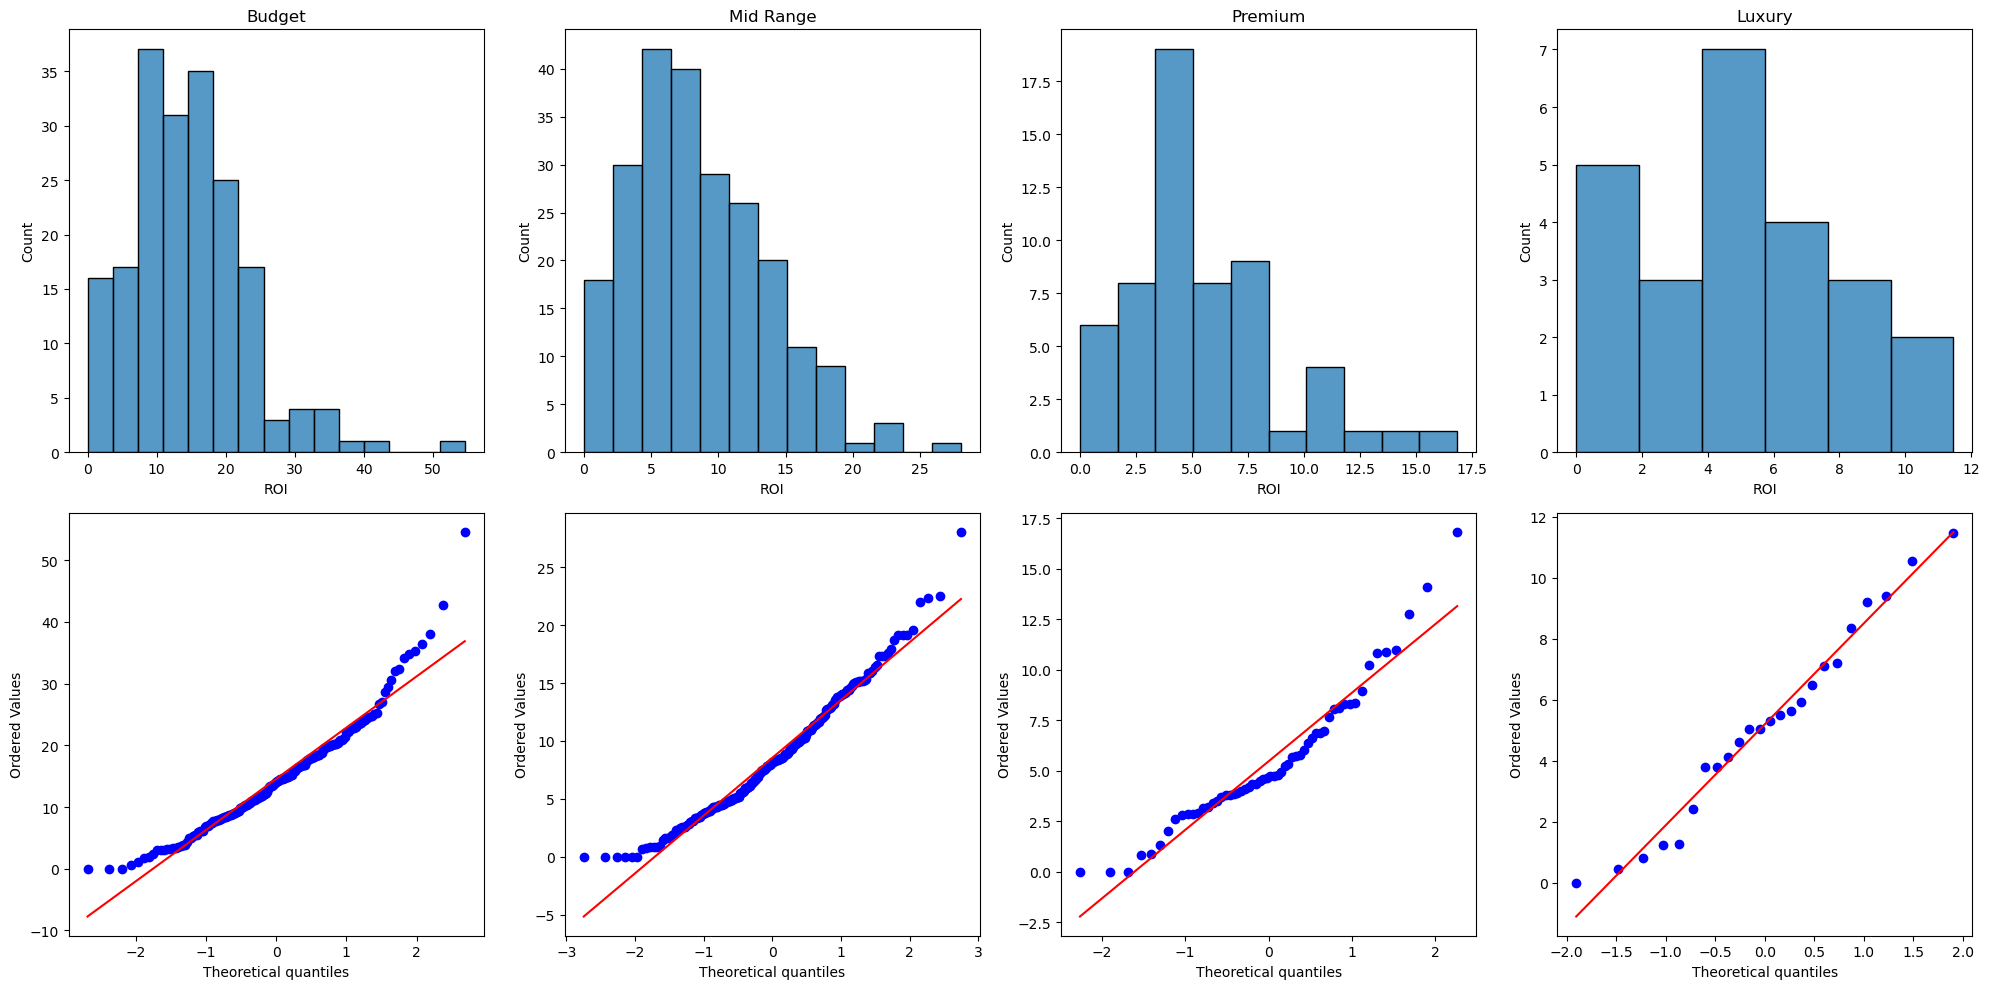

In [29]:
# define variables for the ROI for each vehicle class
budget = df[df['vehicle_class'] == 'budget']['ROI']
mid_range = df[df['vehicle_class'] == 'mid_range']['ROI']
premium = df[df['vehicle_class'] == 'premium']['ROI']
luxury = df[df['vehicle_class'] == 'luxury']['ROI']

# set up sub-plots
fig, axs = plt.subplots(2, 4, figsize = (20, 10))

# histograms
sns.histplot(budget, ax = axs[0 , 0])
sns.histplot(mid_range, ax = axs[0 , 1])
sns.histplot(premium, ax = axs[0 , 2])
sns.histplot(luxury, ax = axs[0 , 3])

# qq plots
stats.probplot(budget, dist = 'norm', plot = axs[1, 0])
stats.probplot(mid_range, dist = 'norm', plot = axs[1, 1])
stats.probplot(premium, dist = 'norm', plot = axs[1, 2])
stats.probplot(luxury, dist = 'norm', plot = axs[1, 3])

# set titles for the top graphs
axs[0, 0].set_title('Budget')
axs[0, 1].set_title('Mid Range')
axs[0, 2].set_title('Premium')
axs[0, 3].set_title('Luxury')

# remove titles for the bottom graphs
axs[1, 0].set_title('')
axs[1, 1].set_title('')
axs[1, 2].set_title('')
axs[1, 3].set_title('')

# adjust layout
plt.tight_layout()

# create a dict of vehicle classes to loop through
classes = {'budget':budget, 'mid_range':mid_range, 'premium':premium, 'luxury':luxury}

# loop through the dict of vehicle classes and run a shapiro-wilk test on each to test for normality
for key, value in classes.items():
    stat, p_value = stats.shapiro(value)
    print(f'shapiro-wilk statistic for {key} = {stat:.2f}')
    print(f'p-value for {key} = {p_value:.4f}')
    print(' ')

histograms, qq plots and shapiro-wilk tests suggest that the data is not normally distributed for any class of vehicles except for luxury vehicles

---



## Kruskal-Wallis Test


I want to determine if there are significant differences in ROI among different car classes. 

Given that the data is non-normal, as shown by histograms, QQ plots, and Shapiro-Wilk tests, I use the Kruskal-Wallis test. 

This non-parametric test serves as an alternative to ANOVA and doesn’t require normality or equal variances. It evaluates whether there are significant differences between the distributions of three or more independent groups based on their ranks, making it appropriate for data that does not meet normality assumptions.

In [30]:
# calculate and print the h-statistic and p-value for Kruskal-Wallis test
h_stat, p_value = stats.kruskal(budget, mid_range, premium, luxury)
print(f'H statistic: {h_stat:.4f}')
print(f'p-value: {p_value:.4f}')

H statistic: 118.5779
p-value: 0.0000


---

## Dunn's test - pairwise comparisons

The Kruskal-Wallis test suggests that there are significant differences in ROI among different car classes. 

I follow the Kruskal-Wallis test with Dunn's test using a Bonferroni correction for pairwise comparisons - controlling for the family-wise error rate (FWER). Dunn's test is a non-parametric method that adjusts for multiple comparisons to ensure that the likelihood of Type I errors (incorrectly finding significant differences when there are none) is controlled across all pairwise tests.

The Bonferroni correction adjusts the significance level to account for the number of comparisons, helping to maintain the overall significance level and providing a more reliable assessment of which specific pairs of groups exhibit significant differences.

Significant p-values are highlighted in yellow, while non-significant p-values are highlighted in red.

---

### Results

Dunn's test indicates that there is a significant difference in ROI between each vehicle class, except for the difference between luxury and premium classes.

In [31]:
# Dunn's test for pairwise comparisons
p_values = sp.posthoc_dunn(df, val_col = 'ROI', group_col = 'vehicle_class', p_adjust = 'bonferroni')

# define a function for highlighting values
def highlight_significant(val):
    color = 'lightcoral' if val > .05 else 'lightyellow'
    return f'background-color: {color}'

# color the p-values
styled_p_values = p_values.style.applymap(highlight_significant)

# view the df
styled_p_values

,budget,luxury,mid_range,premium
budget,1.000000,0.000000,0.000000,0.000000
luxury,0.000000,1.000000,0.037354,1.000000
mid_range,0.000000,0.037354,1.000000,0.000539
premium,0.000000,1.000000,0.000539,1.000000


---

## Visualization with boxplot


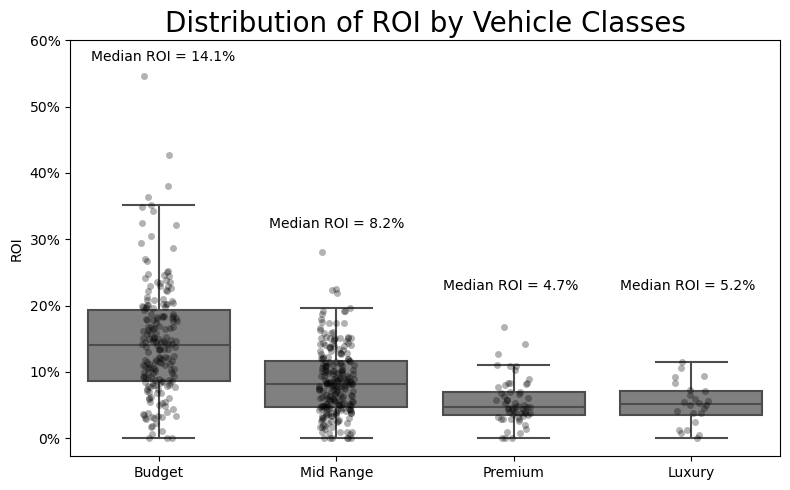

In [63]:
# specify a figure size
plt.figure(figsize=(8, 5))


# boxplot
ax = sns.boxplot(data = df, 
            x = 'vehicle_class', 
            y = 'ROI', 
            showfliers = False, 
            order = ['budget', 'mid_range', 'premium', 'luxury'], 
            color = 'grey')

# one dot for every vehicle
sns.stripplot(data = df, 
              x = 'vehicle_class', 
              y = 'ROI', 
              color = 'black', 
              jitter = True, 
              order = ['budget', 'mid_range', 'premium', 'luxury'], 
              alpha = .3)

# calculate medians
median_budget = budget.median()
median_midrange = mid_range.median()
median_premium = premium.median()
median_luxury = luxury.median()

# add text with median ROI for each class
plt.annotate(f'Median ROI = {median_budget:.1f}%', 
             xycoords = 'axes fraction', 
             xy = (.03, .95), 
             color = 'black')

plt.annotate(f'Median ROI = {median_midrange:.1f}%', 
             xycoords = 'axes fraction', 
             xy = (.28, .55), 
             color = 'black')

plt.annotate(f'Median ROI = {median_premium:.1f}%', 
             xycoords = 'axes fraction', 
             xy = (.525, .40), 
             color = 'black')

plt.annotate(f'Median ROI = {median_luxury:.1f}%', 
             xycoords = 'axes fraction', 
             xy = (.775, .40), 
             color = 'black')

# title and labels
plt.title('Distribution of ROI by Vehicle Classes', fontsize = 20)
plt.xlabel('')
plt.ylabel('ROI')

# rename y-ticks and x-ticks
plt.xticks(ticks = ax.get_xticks(), 
           labels = ['Budget', 'Mid Range', 'Premium', 'Luxury'])
plt.yticks(ticks = [0, 10, 20, 30, 40, 50, 60], labels = ['0%', '10%', '20%', '30%', '40%', '50%', '60%'])
plt.tight_layout()

# save plot
plt.savefig(r"F:\Data Scraping\Turo\plots\15", dpi = 300)

---

### Top cars in the budget and mid range price class

In [33]:
# sub-set values to create a df for each class
budget_df = df[df['vehicle_class'] == 'budget']
mid_range_df = df[df['vehicle_class'] == 'mid_range']
premium_df = df[df['vehicle_class'] == 'premium']
luxury_df = df[df['vehicle_class'] == 'luxury']

# sub set budget_df to remove vehicles from the years 2011 and 2012 because turos policy wont allow new hosts to host vehicles this old
budget_df_subset = budget_df[~budget_df['year_oct2023'].isin(['2011', '2012'])]

# find the top 10 highest performing vehicles in the budget price class
budget_df_subset.groupby(by = 'make_oct2023:model_oct2023:year_oct2023').agg({'ROI':'median'}).sort_values(by = 'ROI', ascending = False).head(10)

,ROI
make_oct2023:model_oct2023:year_oct2023,
Nissan:Altima:2015,42.730
Chevrolet:Cruze:2016,38.995
Nissan:Versa Note:2016,38.050
Nissan:Sentra:2015,34.830
FIAT:500X:2016,34.225
Nissan:Maxima:2014,29.400
Nissan:Versa:2019,28.710
Nissan:Rogue Sport:2017,26.990
Hyundai:Tucson:2017,26.690


In [34]:
# find the top 10 highest performing vehicles in the mid-range price class

mid_range_df.groupby(by = 'make_oct2023:model_oct2023:year_oct2023').agg({'ROI':'median'}).sort_values(by = 'ROI', ascending = False).head(10)

,ROI
make_oct2023:model_oct2023:year_oct2023,
Dodge:Durango:2017,28.03
Volkswagen:Tiguan:2019,19.59
Mercedes-Benz:C-Class:2016,19.15
BMW:X3:2020,19.11
Ford:Transit:2018,18.00
Nissan:Rogue Sport:2021,17.93
Tesla:Model 3:2021,17.33
Nissan:Pathfinder:2022,16.59
Jaguar:F-PACE:2019,16.36
